### Support Vector Machine (SVM)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## bring data, fix SVM

In [2]:
from sklearn import svm, datasets

- fit model

In [3]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
X=iris.data[:, :2]
y = iris.target

In [5]:
clf = svm.SVC(kernel='linear', C=1)
clf

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [6]:
clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [7]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 15, 35]])

### kernel SVM fit and compare

- LinearSVC

In [8]:
clf = svm.LinearSVC(C=1, max_iter=10000)
clf

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [9]:
clf.fit(X, y)
y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[49,  1,  0],
       [ 2, 30, 18],
       [ 0,  9, 41]])

- radial basis function

In [10]:
clf = svm.SVC(kernel='rbf', gamma=0.7, C=1, max_iter=10000)
clf.fit(X, y)
y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 37, 13],
       [ 0, 13, 37]])

- polynomial kernel

In [11]:
clf = svm.SVC(kernel='poly', degree=3, C=1, gamma='auto')
clf.fit(X, y)
y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 16, 34]])

In [19]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
    

- bring data

In [14]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

### defind model and fit them all

In [20]:
C = 1
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=1, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C, gamma='auto'))
models = (clf.fit(X,y) for clf in models)

In [21]:
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

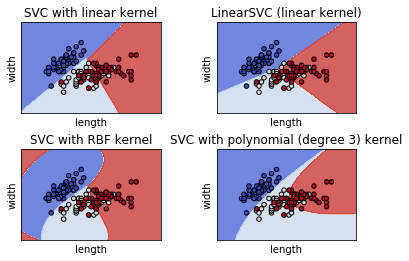

In [22]:
fig, sub = plt.subplots(2,2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:,0], X[:, 1]
xx ,yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                 cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c = y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('length')
    ax.set_ylabel('width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    
plt.show()